In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!unzip -o -q "/content/drive/MyDrive/archive (10).zip" -d "/content/dataset"





In [7]:
import os
base_dir = "/content/dataset"
folders = ["train/cats", "train/dogs", "test/cats", "test/dogs"]

for f in folders:
    path = os.path.join(base_dir, f)
    if os.path.exists(path):
        print(f"{f}: {len(os.listdir(path))} file")
    else:
        print(f"{f}: folder tidak ditemukan")

train/cats: 10000 file
train/dogs: 10000 file
test/cats: 2500 file
test/dogs: 2500 file


In [8]:
train_dir = base_dir + "/train"
test_dir  = base_dir + "/test"

IMG_SIZE = (128,128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Siapkan generator untuk test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 5000 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 221ms/step


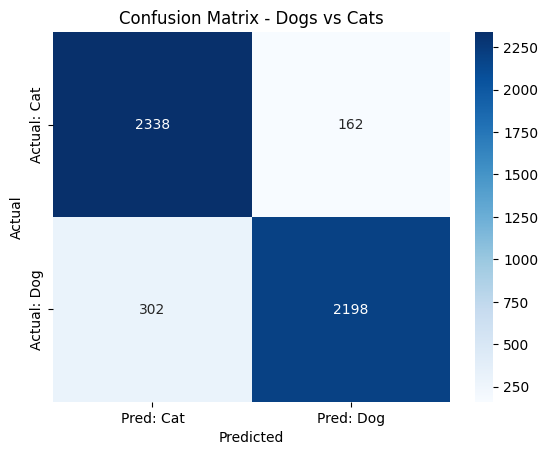

              precision    recall  f1-score   support

         Cat       0.89      0.94      0.91      2500
         Dog       0.93      0.88      0.90      2500

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

model = load_model("dogs_cats_model2.h5")
y_true = test_generator.classes

y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred: Cat', 'Pred: Dog'],
            yticklabels=['Actual: Cat', 'Actual: Dog'])
plt.title('Confusion Matrix - Dogs vs Cats')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_true, y_pred, target_names=['Cat', 'Dog']))